In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple


In [2]:
earth = Horizons(id='399', location='@sun',epochs={'start':'2030-01-01', 'stop':'2050-01-01','step':'1d'},id_type='majorbody')

In [3]:
jupiter = Horizons(id='599', location='@sun',epochs={'start':'2030-01-01', 'stop':'2050-01-01','step':'1d'},id_type='majorbody')

In [4]:
uranus = Horizons(id='799', location='@sun',epochs={'start':'2030-01-01', 'stop':'2050-01-01','step':'1d'},id_type='majorbody')

In [5]:
neptune = Horizons(id='899', location='@sun',epochs={'start':'2030-01-01', 'stop':'2050-01-01','step':'1d'},id_type='majorbody')

In [6]:
e = earth.vectors()
j = jupiter.vectors()
u = uranus.vectors()
n = neptune.vectors()

In [60]:
ue = np.sqrt((u['x'] - e['x'])**2 + (u['y'] - e['y'])**2 #+ (u['z'] - e['z'])**2
            )
en = np.sqrt((e['x'] - n['x'])**2 + (e['y'] - n['y'])**2 #+ (e['z'] - n['z'])**2
            )
un = np.sqrt((u['x'] - n['x'])**2 + (u['y'] - n['y'])**2 #+ (u['z'] - n['z'])**2
            )

In [61]:
angle_uen = np.arccos((ue**2 + en**2 - un**2)/(2*ue*en))
angle_enu = np.arccos((un**2 + en**2 - ue**2)/(2*un*en))
angle_nue = np.arccos((un**2 + ue**2 - en**2)/(2*un*ue))

In [62]:
nang = np.arctan(n['y'][5357]/n['x'][5357])/np.pi*180

In [10]:
jang = np.arctan(j['y'][1065]/j['x'][1065])/np.pi*180

In [11]:
nang - jang

94.06884558118146

In [22]:
print(j['x'][1065],j['y'][1065])
print(u['x'][4473],u['y'][4473])
print(n['x'][5357],n['y'][5357])

3.158066001895524 -3.992871547647523
-12.09183883709242 13.96978352126276
21.9984576279692 20.0945596196478


In [33]:
2030+np.linspace(0,7305,7306)[1065:5358]

array([3095., 3096., 3097., ..., 7385., 7386., 7387.])

In [135]:
nx[:4474-1065].size

3409

In [137]:
angle_1e2 = np.arccos((np.sqrt((ux-e['x'][1065:4474])**2 + (uy - e['y'][1065:4474])**2)**2
                       + np.sqrt((nx[:4474-1065]-e['x'][1065:4474])**2 + (ny[:4474-1065] - e['y'][1065:4474])**2)**2
                       - np.sqrt((nx[:4474-1065]-ux)**2 + (ny[:4474-1065] - uy)**2)**2)/
                      (2*np.sqrt((ux-e['x'][1065:4474])**2 + (uy - e['y'][1065:4474])**2)
                       *np.sqrt((nx[:4474-1065]-e['x'][1065:4474])**2 + (ny[:4474-1065] - e['y'][1065:4474])**2)))

In [144]:
angle_1e2_2 = np.arccos((np.sqrt((u['x'][4474:5358]-e['x'][4474:5358])**2 + (u['y'][4474:5358] - e['y'][4474:5358])**2)**2
                       + np.sqrt((nx[4474-1065:]-e['x'][4474:5358])**2 + (ny[4474-1065:] - e['y'][4474:5358])**2)**2
                       - np.sqrt((nx[4474-1065:]-u['x'][4474:5358])**2 + (ny[4474-1065:] - u['y'][4474:5358])**2)**2)/
                      (2*np.sqrt((u['x'][4474:5358]-e['x'][4474:5358])**2 + (u['y'][4474:5358] - e['y'][4474:5358])**2)
                       *np.sqrt((nx[4474-1065:]-e['x'][4474:5358])**2 + (ny[4474-1065:] - e['y'][4474:5358])**2)))

In [17]:
plt.rcParams['axes.linewidth'] = 2.5

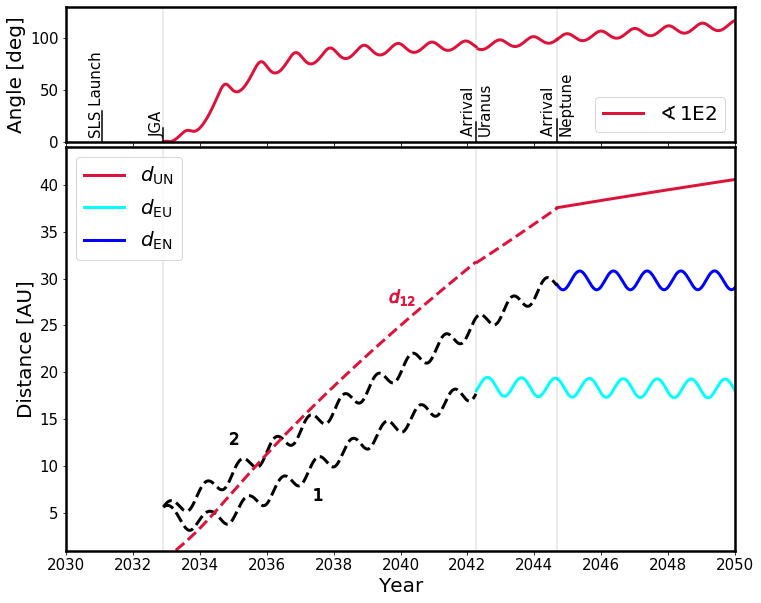

In [162]:
fig, ax = plt.subplots(2,1, figsize = (12,10), sharex =True,gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace = 0.02)
# ax[0].plot(2030+np.linspace(0,7305,7306)/365,angle_uen * 180/np.pi, c= 'Crimson',lw =3, alpha = 0.12)
# ax[0].plot(2030+np.linspace(0,7305,7306)/365,angle_enu * 180/np.pi, c= 'Green',lw =3, alpha = 0.12)
# ax[0].plot(2030+np.linspace(0,7305,7306)/365,angle_nue * 180/np.pi, c= 'DodgerBlue',lw =3, alpha = 0.12)


ax[0].plot(2030+np.linspace(0,7305,7306)[1065:4474]/365,angle_1e2 * 180/np.pi, c= 'Crimson', lw =3)
ax[0].plot(2030+np.linspace(0,7305,7306)[4494+2:5358]/365,angle_1e2_2[22:] * 180/np.pi, c= 'Crimson', lw =3)

ax[0].plot(2030+np.linspace(0,7305,7306)[5357:]/365,angle_uen[5357:] * 180/np.pi, c= 'Crimson', lw =3, label=r'$\sphericalangle \, \mathrm{1E2}$')


# ax[0].plot(2030+np.linspace(0,7305,7306)[5357:]/365,angle_enu[5357:] * 180/np.pi, c= 'Green',lw =3,label=r'$\sphericalangle \, \mathrm{ENU}$')
# ax[0].plot(2030+np.linspace(0,7305,7306)[5357:]/365,angle_nue[5357:] * 180/np.pi, c= 'DodgerBlue',lw =3,label=r'$\sphericalangle \, \mathrm{NUE}$')

# ax[1].plot(2030+np.linspace(0,7305,7306)/365,un, c= 'Crimson',lw =3, alpha = 0.12)
# ax[1].plot(2030+np.linspace(0,7305,7306)/365,ue, c= 'cyan',lw =3, alpha = 0.12)
# ax[1].plot(2030+np.linspace(0,7305,7306)/365,en, c= 'blue',lw =3, alpha = 0.12)

ax[1].plot(2030+np.linspace(0,7305,7306)[5357:]/365,un[5357:], c= 'Crimson',lw =3,label=r'$d_\mathrm{UN}$')
ax[1].plot(2030+np.linspace(0,7305,7306)[4476:]/365,ue[4476:], c= 'cyan',lw =3, label=r'$d_\mathrm{EU}$')
ax[1].plot(2030+np.linspace(0,7305,7306)[5357:]/365,en[5357:], c= 'blue',lw =3,label=r'$d_\mathrm{EN}$')

ax[1].plot(2030+np.linspace(0,7305,7306)[4474:5358]/365,
           np.sqrt((nx[4474-1065:]-u['x'][4474:5358])**2 + (ny[4474-1065:] - u['y'][4474:5358])**2), ls = "--", lw = 3, color = 'Crimson')

ax[1].plot(2030+np.linspace(0,7305,7306)[1065:5358]/365,
           np.sqrt((nx-e['x'][1065:5358])**2 + (ny - e['y'][1065:5358])**2), ls = "--", lw = 3, color = 'k')

ax[1].plot(2030+np.linspace(0,7305,7306)[1065:4474]/365,
           np.sqrt((ux-e['x'][1065:4474])**2 + (uy - e['y'][1065:4474])**2), ls = "--", lw = 3, color = 'k')

ax[1].plot(2030+np.linspace(0,7305,7306)[1065:4474]/365,
           np.sqrt((nx[:4474-1065]-ux)**2 + (ny[:4474-1065] - uy)**2), ls = "--", lw = 3, color = 'Crimson')



ax[0].tick_params(labelsize = 15)
ax[1].tick_params(labelsize = 15)

ax[1].set_xticks(np.linspace(2030,2050,11))

ax[0].set_xlim(2030,2050)
ax[0].set_ylim(0,130)

ax[1].set_ylim(1,44)

ax[1].set_xlabel('Year', size = 20)
ax[0].set_ylabel('Angle [deg]', size = 20)

ax[1].set_ylabel('Distance [AU]', size = 20)

ax[0].axvline(2031+(1/12), ymax = 0.23, c='k')
ax[0].axvline(2032+(11/12), c='k',alpha = 0.1)
ax[0].axvline(2032+(11/12), ymax = 0.1, c='k')
ax[1].axvline(2032+(11/12), c='k',alpha = 0.1)
ax[0].axvline(2042+(3/12), c='k',alpha = 0.1)
ax[1].axvline(2042+(3/12), c='k',alpha = 0.1)
ax[0].axvline(2042+(3/12), ymax = 0.15, c='k')
ax[0].axvline(2044+(8/12), c='k',alpha = 0.1)
ax[1].axvline(2044+(8/12), c='k',alpha = 0.1)
ax[0].axvline(2044+(8/12),ymax = 0.17, c='k')

ax[0].text(2030.7,7, 'SLS Launch', rotation=90, size =15)
ax[0].text(2032.5,7.2, 'JGA', rotation=90, size =15)
ax[0].text(2041.8,8.5, 'Arrival \nUranus', rotation=90, size =15)
ax[0].text(2044.2,8.3, 'Arrival \nNeptune', rotation=90, size =15)

ax[0].legend( loc = 'lower right',fontsize = 20)
ax[1].legend( loc = 'upper left',fontsize = 20)

ax[1].plot(2037.5,7,  marker = '$1$', c = 'black', ms =12)
ax[1].plot(2035,13,  marker = '$2$', c = 'black', ms =12)

ax[1].plot(2040,28,  marker = r'$d_{12}}$', c = 'Crimson', ms =25)

plt.savefig('/Users/denizwork/Desktop/enu.pdf', bbox_inches = 'tight')

No handles with labels found to put in legend.


(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 9 Text yticklabel objects>)

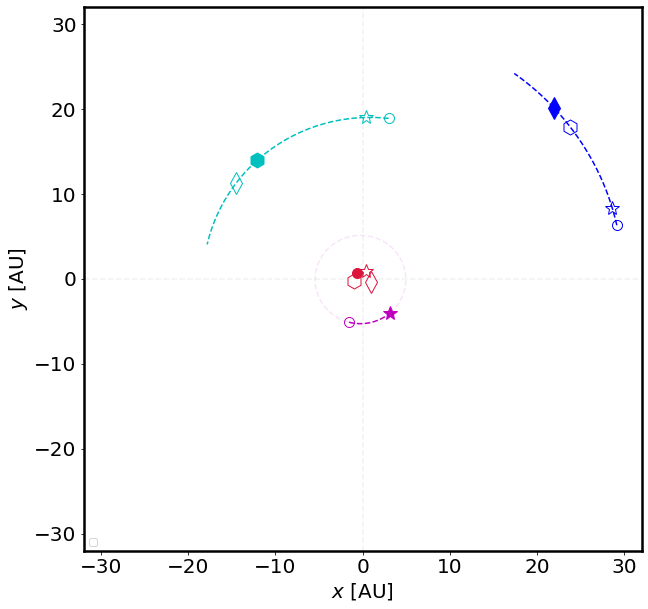

In [11]:
plt.figure(figsize = (10,10))
plt.plot(u['x'][396], u['y'][396],'.', c='c',ms =20, fillstyle='none')
plt.plot(u['x'][396:], u['y'][396:],c = 'c', ls = '--')
plt.plot(u['x'][1065], u['y'][1065],  '*',c = 'c', ms =15, fillstyle='none')
plt.plot(u['x'][4473], u['y'][4473],  'h',c = 'c', ms =15)
plt.plot(u['x'][5357], u['y'][5357],  'd',c = 'c', ms =15, fillstyle='none')


plt.plot(n['x'][396], n['y'][396], '.',c='b',ms =20, fillstyle='none')
plt.plot(n['x'][396:], n['y'][396:], c = 'b', ls = '--')
plt.plot(n['x'][1065], n['y'][1065], '*',c = 'b', ms =15, fillstyle='none')
plt.plot(n['x'][4473], n['y'][4473],  'h',c = 'b', ms =15, fillstyle='none')
plt.plot(n['x'][5357], n['y'][5357],  'd',c = 'b', ms =15)
# plt.plot(n['x'][5357:], n['y'][5357:], c = 'b', ls = '--', alpha = 0.5)


plt.plot(e['x'][396], e['y'][396],'.',c = 'Crimson', ms = 20)
# plt.plot(e['x'][:365], e['y'][:365], c= 'Crimson', ls = '--', alpha = )
plt.plot(e['x'][1065], e['y'][1065],'*',c = 'Crimson', ms = 15, fillstyle='none')
plt.plot(e['x'][4473], e['y'][4473],'h',c = 'Crimson', ms = 15, fillstyle='none')
plt.plot(e['x'][5357], e['y'][5357],  'd',c = 'Crimson', ms =15, fillstyle = 'none')

plt.plot(j['x'][396], j['y'][396],  '.',c = 'm', ms =20, fillstyle='none')
plt.plot(j['x'][396:1065], j['y'][396:1065], 'm', ls = '--')
plt.plot(j['x'][1065:5065], j['y'][1065:5065], 'm', ls = '--', alpha = 0.1)
plt.plot(j['x'][1065], j['y'][1065],  '*',c = 'm', ms =15)

# plt.plot(0, 0,'.',c = 'Crimson', ms = 5)
plt.axhline(0, color= 'gray', ls = '--', alpha = 0.1)
plt.axvline(0, color= 'gray', ls = '--', alpha = 0.1)

plt.legend(loc = 'lower left')

plt.xlim(-32,32)
plt.ylim(-32,32)
plt.xlabel(r'$x$ [AU]', size = 20)
plt.ylabel(r'$y$ [AU]', size = 20)

plt.xticks(size = 20)
plt.yticks(size = 20)

In [13]:
x0 = 3.158066001895524*1.496e11
y0 = -3.992871547647523*1.496e11

x1 = 21.9984576279692*1.496e11
y1 = 20.0945596196478*1.496e11

In [14]:
def r_unit(x,y):
    return np.cos(np.arctan2(y,x)), np.sin(np.arctan2(y,x))

In [15]:
def r_calc(k,r0x = x0, r0y = y0):
    rx = np.zeros(k+1)
    ry = np.zeros(k+1)
    rx[0] = x0
    ry[0] = y0
    
    vx = np.zeros(k+1)
    vy = np.zeros(k+1)
    vx[0] = v0x
    vy[0] = v0y
    
    dt = 60*60*24
    for i in range(k):
        
        rx[i+1] = rx[i] + vx[i] * dt #- 0.5 * dt**2 * 1.327e20 *  r_unit(ry[i],rx[i])[0] / (rx[i]**2 + ry[i]**2)
        ry[i+1] = ry[i] + vy[i] * dt #- 0.5 * dt**2 * 1.327e20 *  r_unit(ry[i],rx[i])[1] / (rx[i]**2 + ry[i]**2)
        
        vx[i+1] = vx[i] - r_unit(rx[i],ry[i])[0] * dt * 1.327e20 / (rx[i]**2 + ry[i]**2)
        vy[i+1] = vy[i] - r_unit(rx[i],ry[i])[1] * dt * 1.327e20 / (rx[i]**2 + ry[i]**2)
        
    return rx, ry
        


In [82]:
v0x = 18100
v0y = 7400
nx = r_calc(rng)[0]/1.496e11
ny = r_calc(rng)[1]/1.496e11

v0x = 8000
v0y = 16150
ux = r_calc(rng2)[0]/1.496e11
uy = r_calc(rng2)[1]/1.496e11

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text yticklabel objects>)

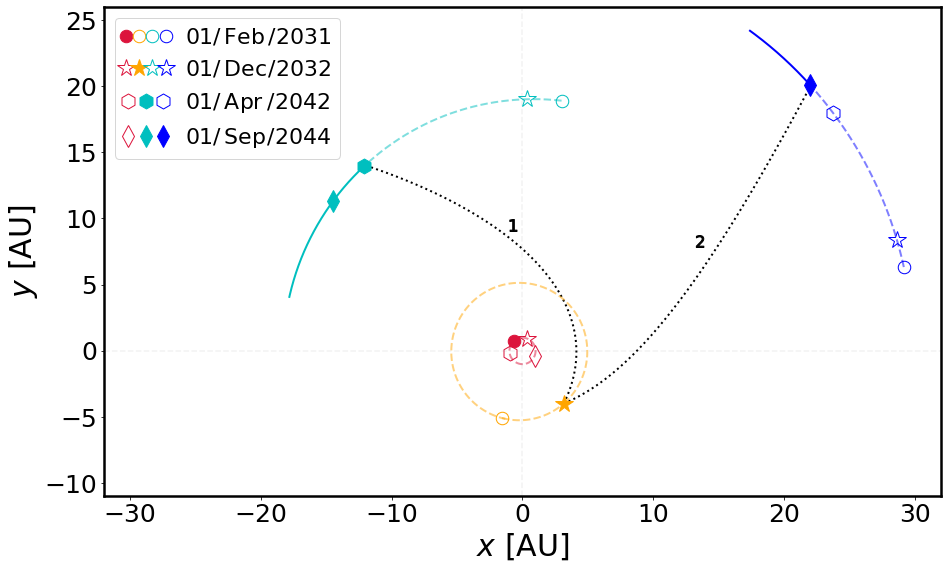

In [168]:
plt.figure(figsize = (15,9))

rng = 4292
rng2 = 3408
v0x = 18100
v0y = 7400
plt.plot(r_calc(rng)[0]/1.496e11,r_calc(rng)[1]/1.496e11, ls = ':', c = 'black', lw =2)
v0x = 8080
v0y = 16200
plt.plot(r_calc(rng2)[0]/1.496e11,r_calc(rng2)[1]/1.496e11, ls = ':', c = 'black', lw =2)
f31e, = plt.plot(e['x'][396], e['y'][396],'.',c = 'Crimson', ms = 25, label = 'February 2031')
plt.plot(e['x'][:365], e['y'][:365], c= 'Crimson', ls = '--', alpha = 0.5, lw = 2)
d32e, = plt.plot(e['x'][1065], e['y'][1065],'*',c = 'Crimson', ms = 18, fillstyle='none')
a42e, = plt.plot(e['x'][4473], e['y'][4473],'h',c = 'Crimson', ms = 15, fillstyle='none')
s44e, = plt.plot(e['x'][5357], e['y'][5357],  'd',c = 'Crimson', ms =15, fillstyle = 'none')


f31j, = plt.plot(j['x'][396], j['y'][396],  '.',c = 'orange', ms =25, fillstyle='none', label = 'February 2031')
plt.plot(j['x'][396:1065], j['y'][396:1065], 'orange', ls = '--',alpha = 0.5, lw = 2)
d32j, = plt.plot(j['x'][1065], j['y'][1065],  '*',c = 'orange', ms =18)
plt.plot(j['x'][1065:4765], j['y'][1065:4765], 'orange', ls = '--', alpha = 0.5, lw = 2)

f31u, = plt.plot(u['x'][396], u['y'][396],'.', c='c',ms =25, fillstyle='none', label = 'February 2031')
plt.plot(u['x'][396:4473], u['y'][396:4473],c = 'c', ls = '--', alpha = 0.5, lw = 2)
d32u, =  plt.plot(u['x'][1065], u['y'][1065],  '*',c = 'c', ms =18, fillstyle='none')
a42u, = plt.plot(u['x'][4473], u['y'][4473],  'h',c = 'c', ms =15)
plt.plot(u['x'][4473:], u['y'][4473:],c = 'c',  lw = 2)
s44u, = plt.plot(u['x'][5357], u['y'][5357],  'd',c = 'c', ms =15)


f31n, = plt.plot(n['x'][396], n['y'][396], '.',c='b',ms =25, fillstyle='none', label = 'February 2031')
plt.plot(n['x'][396:5357], n['y'][396:5357], c = 'b', ls = '--', alpha = 0.5, lw = 2)
d32n, = plt.plot(n['x'][1065], n['y'][1065], '*',c = 'b', ms =18, fillstyle='none')
a42n, = plt.plot(n['x'][4473], n['y'][4473],  'h',c = 'b', ms =15, fillstyle='none')
s44n, = plt.plot(n['x'][5357], n['y'][5357],  'd',c = 'b', ms =15)
plt.plot(n['x'][5357:], n['y'][5357:], c = 'b', lw = 2)

plt.plot(-0.8,9.5,  marker = '$1$', c = 'black', ms =12)
plt.plot(13.5,8.3,  marker = '$2$', c = 'black', ms =12)

# plt.plot([j['x'][1065],n['x'][5357]], [j['y'][1065],n['y'][5357]], ls = ':', c = 'black', alpha = 0.2)

# plt.plot([j['x'][1065],u['x'][4473]], [j['y'][1065],u['y'][4473]], ls = ':', c = 'black', alpha = 0.2)



# plt.plot(0, 0,'.',c = 'Crimson', ms = 5)
plt.axhline(0, color= 'gray', ls = '--', alpha = 0.1)
plt.axvline(0, color= 'gray', ls = '--', alpha = 0.1)



# plt.legend(loc = 'upper left', fontsize = 20)
plt.legend([(f31e, f31j, f31u, f31n),(d32e, d32j, d32u, d32n),(a42e, a42u, a42n),(s44e, s44u, s44n)],
           [r'01/$\,$Feb$\,$/2031','01/$\,$Dec$\>\!$/2032','01/$\,$Apr$\>$/2042','01/$\,$Sep$\>\!$/2044'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)},loc = 'upper left', fontsize = 22)
plt.xlim(-32,32)
plt.ylim(-11,26)
plt.xlabel(r'$x$ [AU]', size = 30)
plt.ylabel(r'$y$ [AU]', size = 30)

plt.xticks(size = 25)
plt.yticks(size = 25)

# plt.savefig('/Users/denizwork/Desktop/ss.pdf', bbox_inches = 'tight')

In [ ]:
plt.figure(figsize = (15,9))
f31e, = plt.plot(e['x'][396], e['y'][396],'.',c = 'Crimson', ms = 30, label = 'February 2031')
plt.plot(e['x'][:365], e['y'][:365], c= 'Crimson', ls = '--', alpha = 0.2, lw = 2)
d32e, = plt.plot(e['x'][1065], e['y'][1065],'*',c = 'Crimson', ms = 23, fillstyle='none')
a42e, = plt.plot(e['x'][4473], e['y'][4473],'h',c = 'Crimson', ms = 20, fillstyle='none')
s44e, = plt.plot(e['x'][5357], e['y'][5357],  'd',c = 'Crimson', ms =20, fillstyle = 'none')


f31j, = plt.plot(j['x'][396], j['y'][396],  '.',c = 'orange', ms =30, fillstyle='none', label = 'February 2031')
plt.plot(j['x'][396:1065], j['y'][396:1065], 'orange', ls = '--',alpha = 0.2, lw = 2)
d32j, = plt.plot(j['x'][1065], j['y'][1065],  '*',c = 'orange', ms =23)
plt.plot(j['x'][1065:4765], j['y'][1065:4765], 'orange', ls = '--', alpha = 0.2, lw = 2)

f31u, = plt.plot(u['x'][396], u['y'][396],'.', c='c',ms =30, fillstyle='none', label = 'February 2031')
plt.plot(u['x'][396:4473], u['y'][396:4473],c = 'c', ls = '--', alpha = 0.2, lw = 2)
d32u, =  plt.plot(u['x'][1065], u['y'][1065],  '*',c = 'c', ms =23, fillstyle='none')
a42u, = plt.plot(u['x'][4473], u['y'][4473],  'h',c = 'c', ms =20)
plt.plot(u['x'][4473:], u['y'][4473:],c = 'c', ls = '--', lw = 2)
s44u, = plt.plot(u['x'][5357], u['y'][5357],  'd',c = 'c', ms =20, fillstyle='none')


f31n, = plt.plot(n['x'][396], n['y'][396], '.',c='b',ms =30, fillstyle='none', label = 'February 2031')
plt.plot(n['x'][396:5357], n['y'][396:5357], c = 'b', ls = '--', alpha = 0.2, lw = 2)
d32n, = plt.plot(n['x'][1065], n['y'][1065], '*',c = 'b', ms =23, fillstyle='none')
a42n, = plt.plot(n['x'][4473], n['y'][4473],  'h',c = 'b', ms =20, fillstyle='none')
s44n, = plt.plot(n['x'][5357], n['y'][5357],  'd',c = 'b', ms =20)
plt.plot(n['x'][5357:], n['y'][5357:], c = 'b', ls = '--', lw = 2)

plt.plot(-6.2,7,  marker = '$1$', c = 'black', ms =12)
plt.plot(13,8.8,  marker = '$2$', c = 'black', ms =12)

plt.plot([j['x'][1065],n['x'][5357]], [j['y'][1065],n['y'][5357]], ls = ':', c = 'black', alpha = 0.2)

plt.plot([j['x'][1065],u['x'][4473]], [j['y'][1065],u['y'][4473]], ls = ':', c = 'black', alpha = 0.2)



# plt.plot(0, 0,'.',c = 'Crimson', ms = 5)
plt.axhline(0, color= 'gray', ls = '--', alpha = 0.1)
plt.axvline(0, color= 'gray', ls = '--', alpha = 0.1)



# plt.legend(loc = 'upper left', fontsize = 20)
plt.legend([(f31e, f31j, f31u, f31n),(d32e, d32j, d32u, d32n),(a42e, a42u, a42n),(s44e, s44u, s44n)],
           [r'01/$\,$Feb$\,$/2031','01/$\,$Dec$\>\!$/2032','01/$\,$Apr$\>$/2042','01/$\,$Sep$\>\!$/2044'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)},loc = 'upper left', fontsize = 22)
plt.xlim(-32,32)
plt.ylim(-11,26)
plt.xlabel(r'$x$ [AU]', size = 20)
plt.ylabel(r'$y$ [AU]', size = 20)

plt.xticks(size = 20)
plt.yticks(size = 20)

plt.savefig('/Users/denizwork/Desktop/ss.pdf', bbox_inches = 'tight')